In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Reading the new csv file into a dataframe
df = pd.read_csv(r'./amazon-dataset-modified.csv')
df

,Unnamed: 0,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",2.63,8.40,0.69,4.4,426973.0,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
1,16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",167.99,299.99,0.44,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...
2,19,B08DPLCM6T,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"Electronics|HomeTheater,TV&Video|Televisions|S...",161.88,263.88,0.39,4.3,11976.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AHBNKB74LGTYUOKPAJBSKNFV45CA,AFIECTV45ADX5YPTE...","NIRMAL.N,Manoj kumar,SOMNATH DAS,Harsha,Pradhu...","R2PNR69G0BQG2F,R31A0WWDEYMKEW,R2C4XEWFLVU7JV,R...","Sound quality,Very nice,Value for money,Good,G...","LG was always Good , correct delivery, good se...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LG-inches-Ready-Smart-32...
3,21,B085194JFL,tizum HDMI to VGA Adapter Cable 1080P for Proj...,"Electronics|HomeTheater,TV&Video|Accessories|C...",3.35,5.99,0.44,3.7,10962.0,Superior Stability: Built-in advanced Certifie...,"AEO5FHWNOSFBT554DKQAG4ICBGFQ,AGIQ5Y7Q4MKZ542KK...","aditya d.,Paranthaman,ashik rahman c,Rajas c.,...","R1GYK05NN6747O,R1J21BZ29NGQF9,R16JCHEILBYOMW,R...","Good product ; Average Finishing,Save it purpo...",This connector has provided as a boon for my o...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Adapter-Projector-Comput...
4,22,B09F6S8BT6,Samsung 80 cm (32 Inches) Wondertainment Serie...,"Electronics|HomeTheater,TV&Video|Televisions|S...",161.88,274.80,0.41,4.3,16299.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AHEVO4Q5NM4YXMG2HDDXC5XMBGRQ,AFZPH7ZAWX5VDY3HO...","Rahman Ali,MARIYA DASS,Md Aftab,roshan s.,Moha...","R1SN0D4DFBKAZI,R1SX5L77L2CD6V,R1NAZ6M4QBUJMK,R...","Good,Sound is very low another brand comparing...","Overall good.,TV picture ok smart betterSound ...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Samsung-Inches-Wondertai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,1012,B014SZPBM4,"Duracell Ultra Alkaline D Battery, 2 Pcs",Electronics|GeneralPurposeBatteries&BatteryCha...,4.56,4.80,0.05,4.4,2111.0,Long Lasting Power Guaranteed|Our best battery...,"AEGQJH2NIAS54T7WKAHKVEO4B67A,AFDH4NWAAHAVKPQVB...","Md asif akhter,KIRAN T,Hanuman sarda,Pranav Ch...","R1RXFMVZ8EKN3Q,R2YX4PL3F59OHC,RUDJ9ISAQDD3B,R3...","Battery,Good buy,Bigger than expected,Best Bat...","Duracell never disappoint you,Good,https://m.m...",https://m.media-amazon.com/images/I/51BGUyveMf...,https://www.amazon.in/Duracell-Alkaline-Batter...
526,1015,B078W65FJ7,boAt BassHeads 900 On-Ear Wired Headphones wit...,"Electronics|Headphones,Earbuds&Accessories|Hea...",10.19,29.88,0.66,4.2,91188.0,"Enjoy powerful, dynamic sound with punchy bass...","AFM6IHWXNLXOBO3JZTO5DN5QJROQ,AHXEMXDI7LE4FLGEU...","Sayan,Lucky,Anish Kadivar,Surjit pharmacist,An...","R1ENIO169KEJPW,R1V9WVGGU6G0SZ,R1CS1EB6REPXU6,R...","Definitely good but wire is 

In [31]:
# Displaying general overview of the current DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           530 non-null    int64  
 1   product_id           530 non-null    object 
 2   product_name         530 non-null    object 
 3   category             530 non-null    object 
 4   discounted_price     530 non-null    float64
 5   actual_price         530 non-null    float64
 6   discount_percentage  530 non-null    float64
 7   rating               530 non-null    float64
 8   rating_count         530 non-null    float64
 9   about_product        530 non-null    object 
 10  user_id              530 non-null    object 
 11  user_name            530 non-null    object 
 12  review_id            530 non-null    object 
 13  review_title         530 non-null    object 
 14  review_content       530 non-null    object 
 15  img_link             530 non-null    obj

<Axes: xlabel='discounted_price', ylabel='Count'>

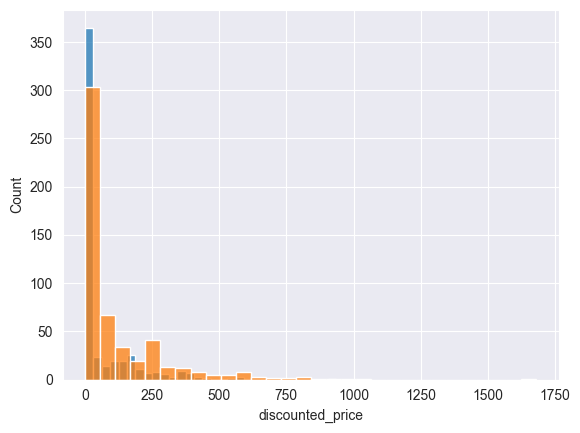

In [32]:
# Performing Univariate Analysis on prices
sns.histplot(df.discounted_price, bins=30)  # Discounted Price
sns.histplot(df.actual_price, bins=30)      # Actual Price

<Axes: xlabel='rating', ylabel='Count'>

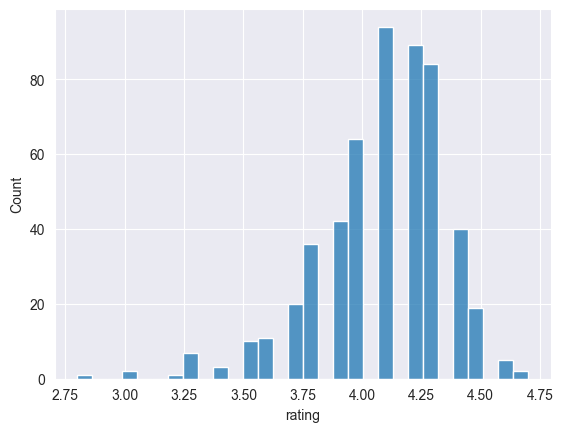

In [33]:
sns.histplot(df.rating, bins=30)  # Ratings